In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata
sdata

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tophat_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'expanded_cells20': GeoDataFrame shape: (11228, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_segmentation': GeoDataFrame shape: (50, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_size': GeoDataFrame shape: (280, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_

In [3]:
# count the number of principal components that explain at least 1% of the variance
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
n_pca
# play with the number of neighbors 
# Larger values result in more global views of the manifold, while smaller values result in more local data being preserved. 
# In general values should be in the range 2 to 100, default = 15
n_neighb = 15
# play with the cluster resolution
# A parameter value controlling the coarseness of the clustering. Higher values lead to more clusters. default = 1 
n_clust_res = 1

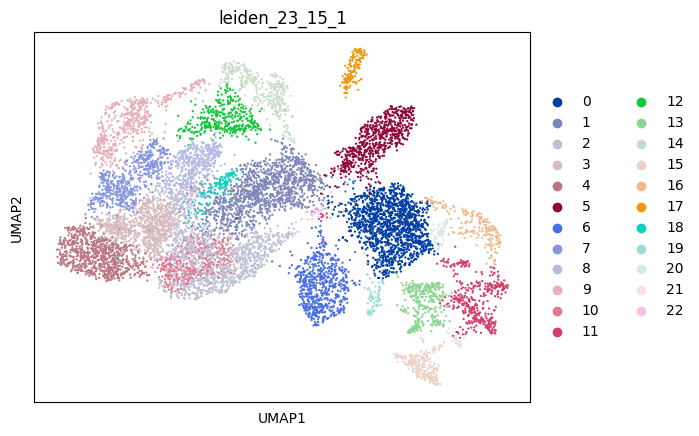

    leiden_23_15_1
0         0.126024
1         0.107143
2         0.097257
3         0.081315
4         0.073566
5         0.059227
6         0.056733
7         0.052547
8         0.051300
9         0.044888
10        0.037496
11        0.036961
12        0.032419
13        0.031439
14        0.028678
15        0.021642
16        0.018080
17        0.013270
18        0.011845
19        0.005967
20        0.005166
21        0.003741
22        0.003295
categories: 0, 1, 2, etc.
var_group_labels: hepa, hepa_chol_stel_fibr_oth, hepa, etc.


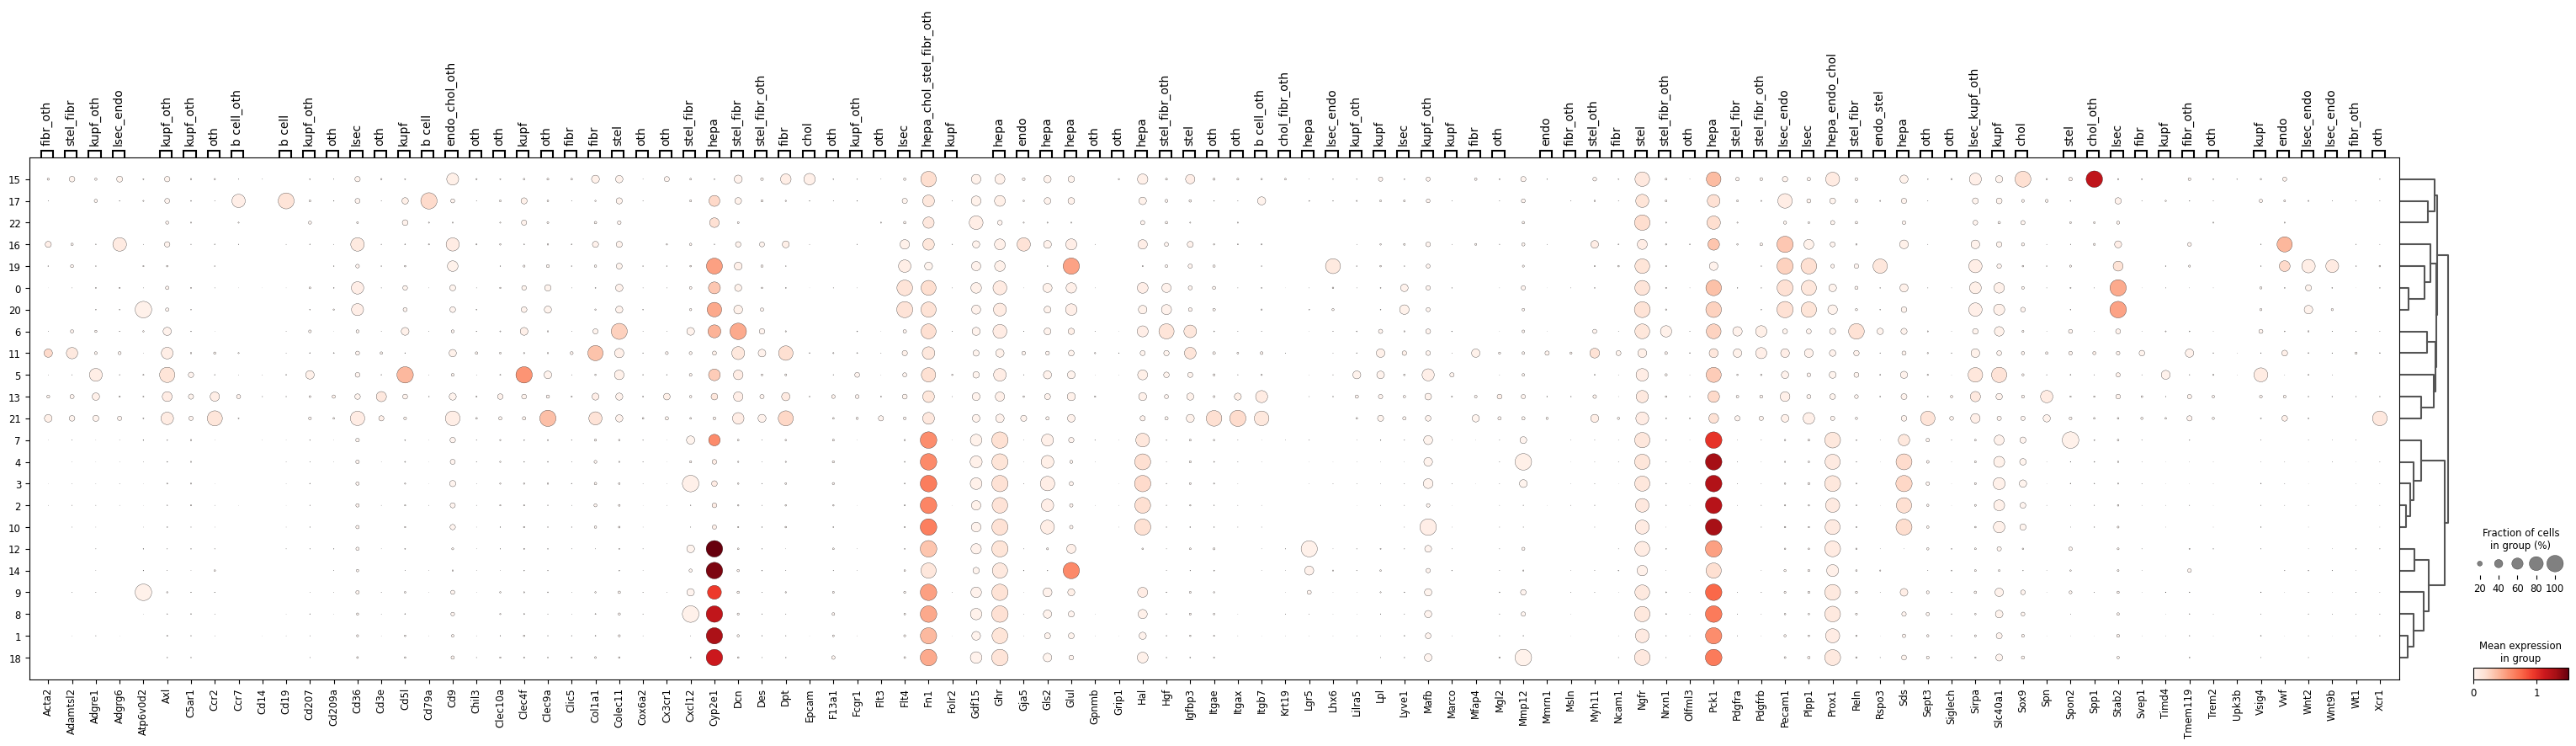

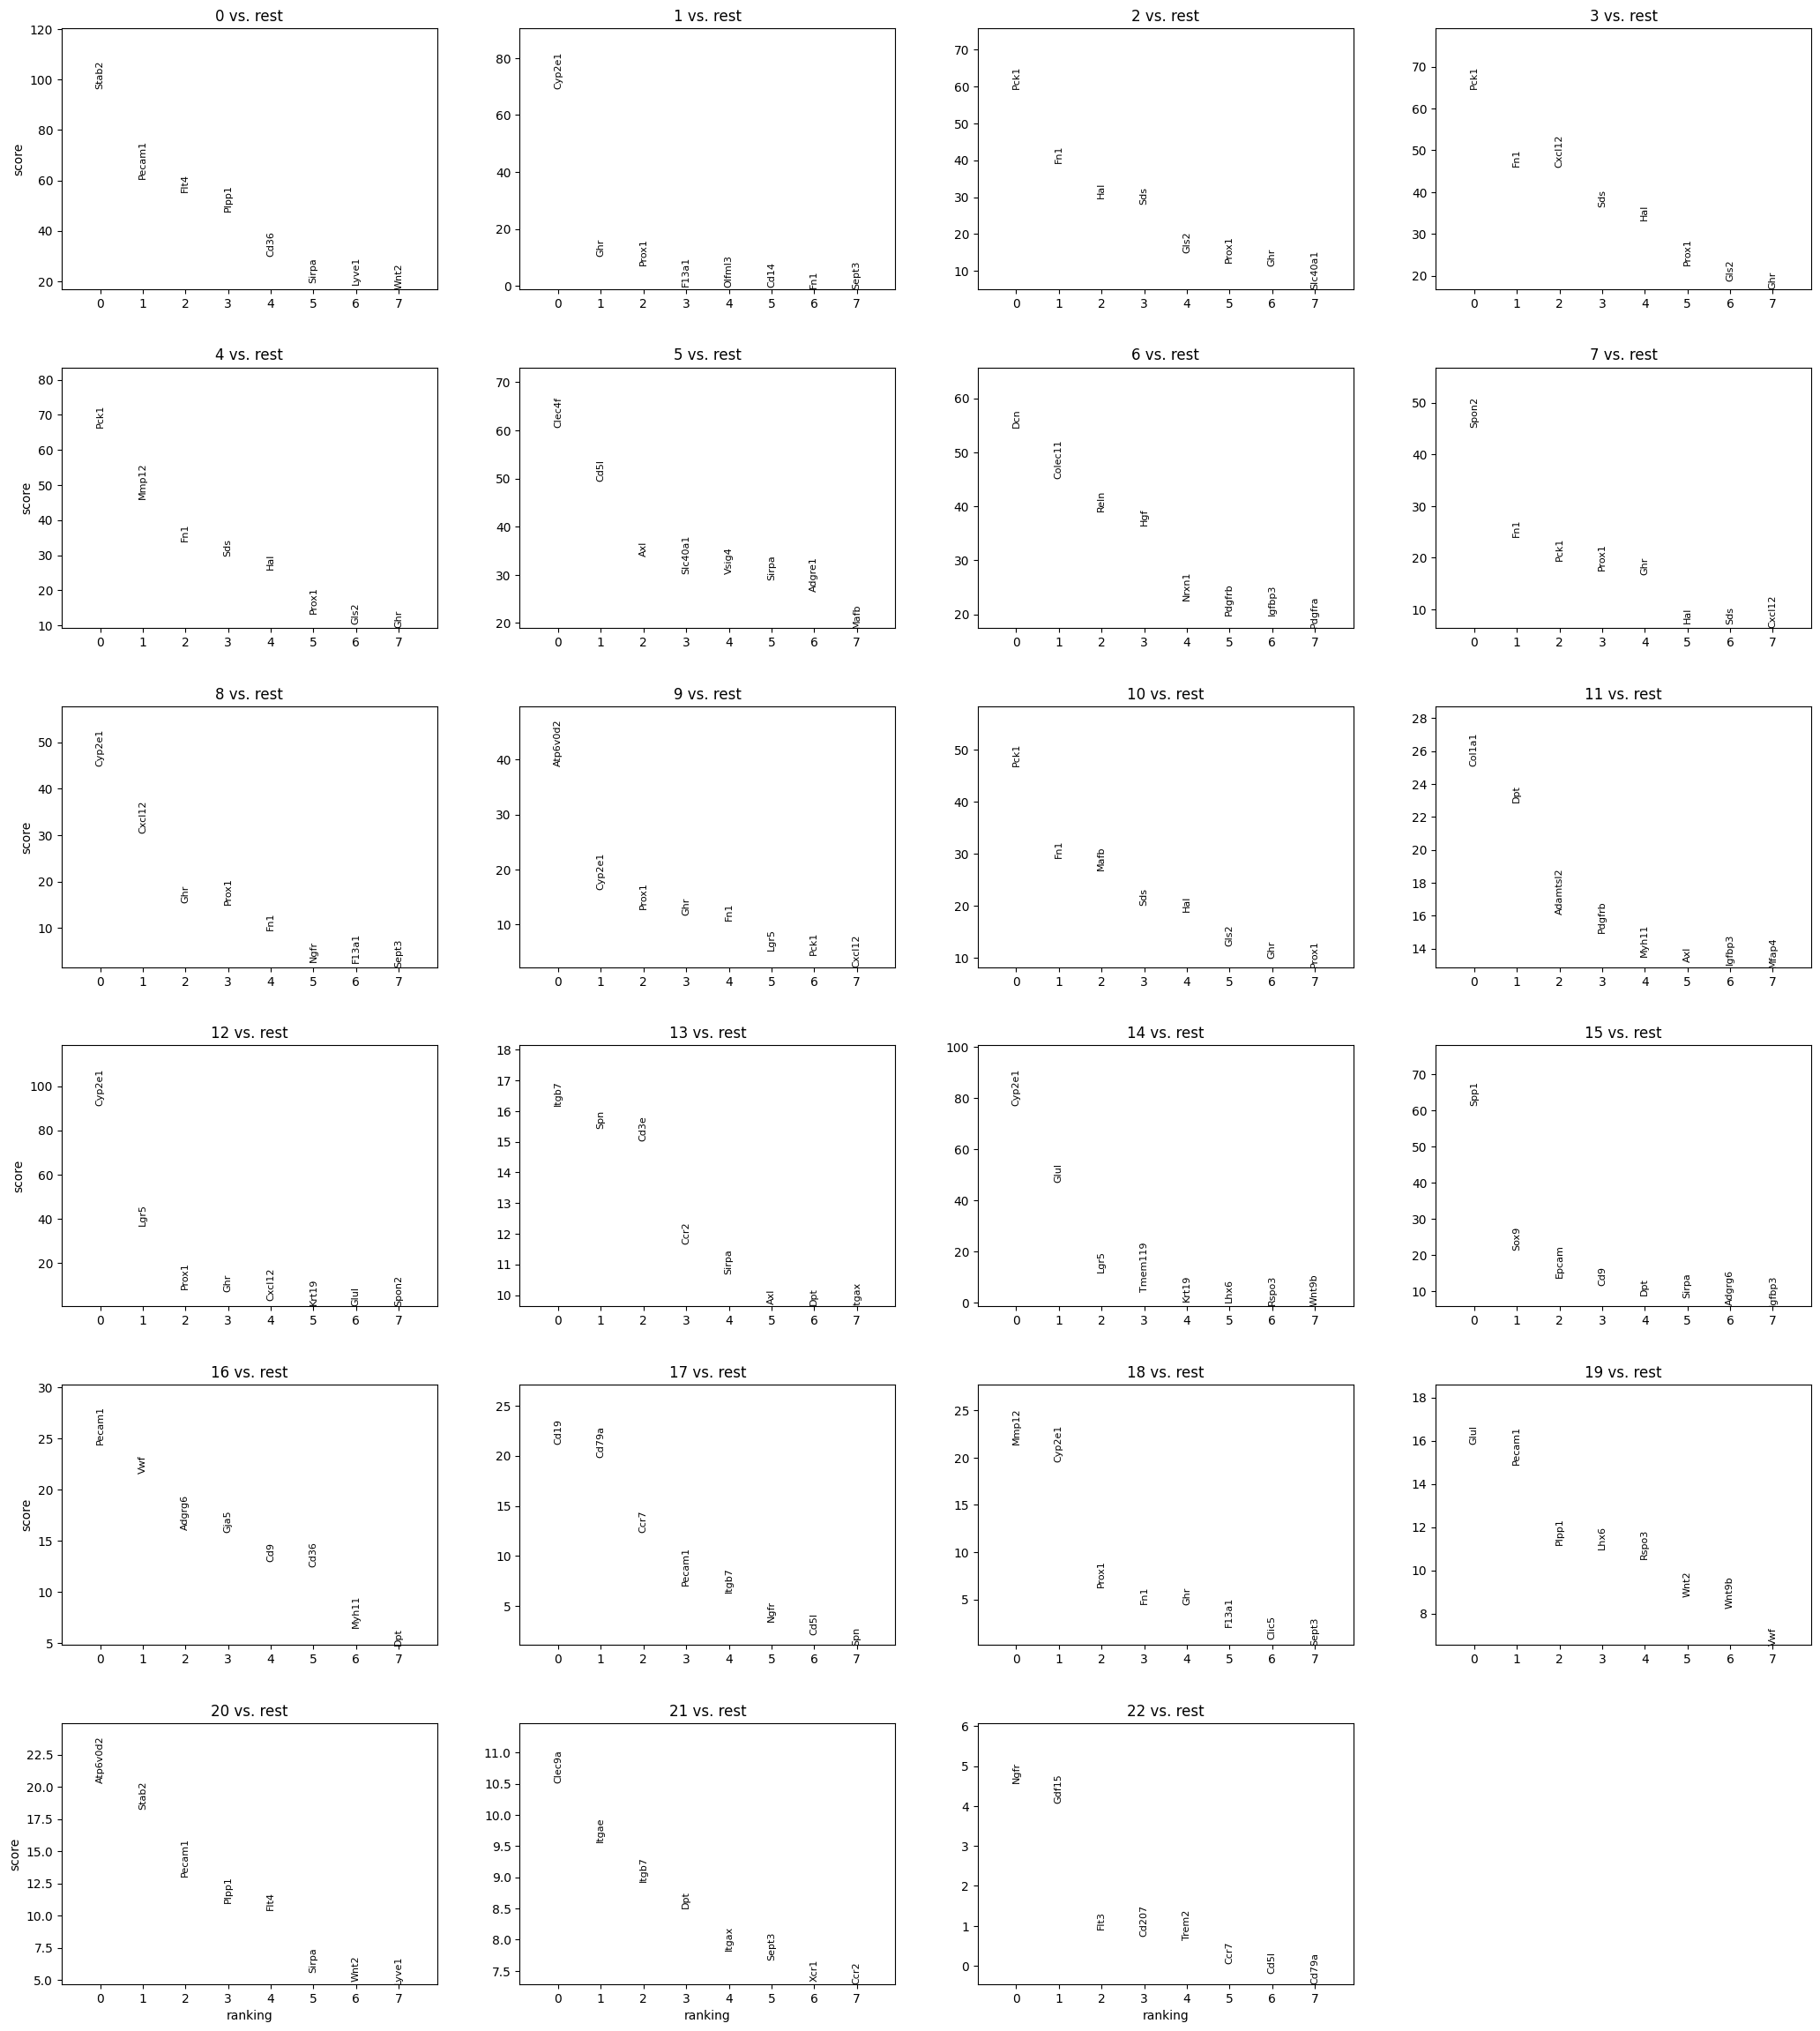

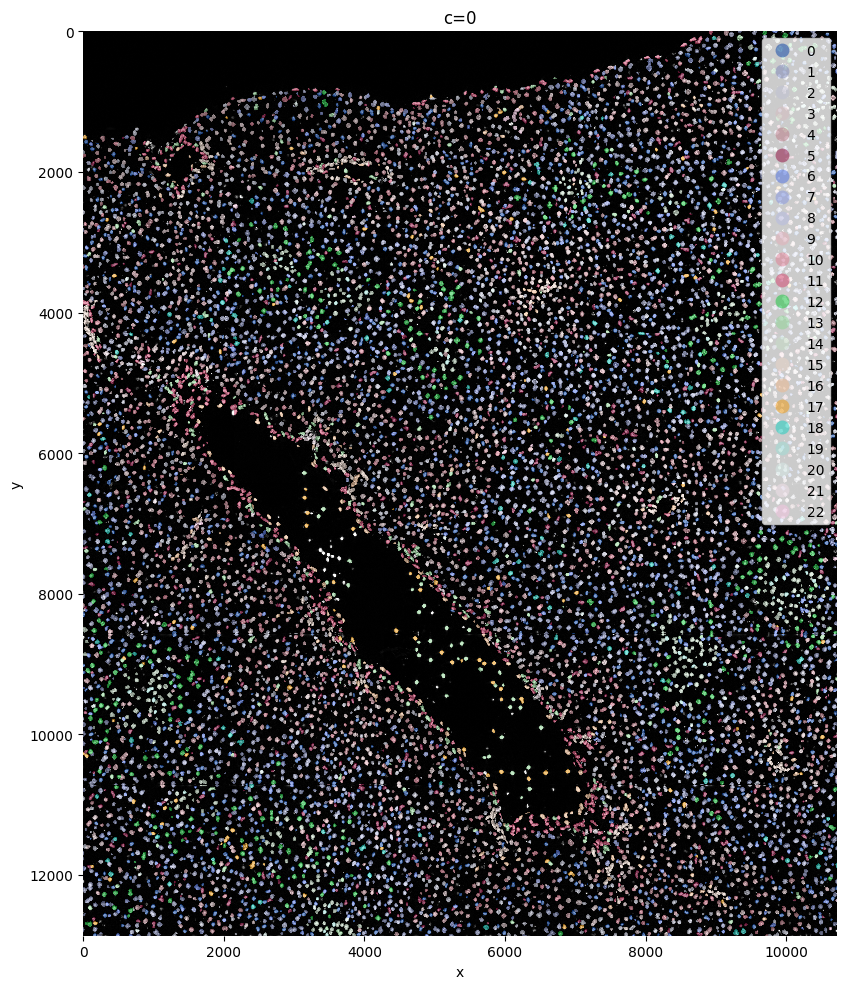

{'B cell': ['17'], 'Chol': ['15'], 'Endo': ['16'], 'Fibr': ['11'], 'Hepa': ['1', '2', '3', '4', '7', '8', '9', '10', '12', '14', '18'], 'Kupf': ['5'], 'LSEC': ['0', '19', '20'], 'Oth': ['13', '21'], 'Stel': ['6', '22']}


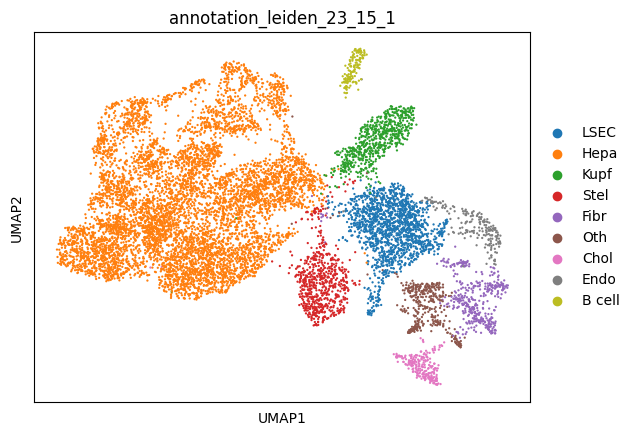

           atlas  annotation_leiden_23_15_1
B cell  0.006215                   0.013270
Chol    0.026733                   0.021642
Hepa    0.579985                   0.618454
Oth     0.061609                   0.035180
Kupf    0.032037                   0.059227
Endo    0.032894                   0.018080
LSEC    0.092414                   0.137157
Fibr    0.030430                   0.036961
Stel    0.137683                   0.060029
categories: LSEC, Hepa, Kupf, etc.
var_group_labels: hepa, hepa_chol_stel_fibr_oth, hepa, etc.


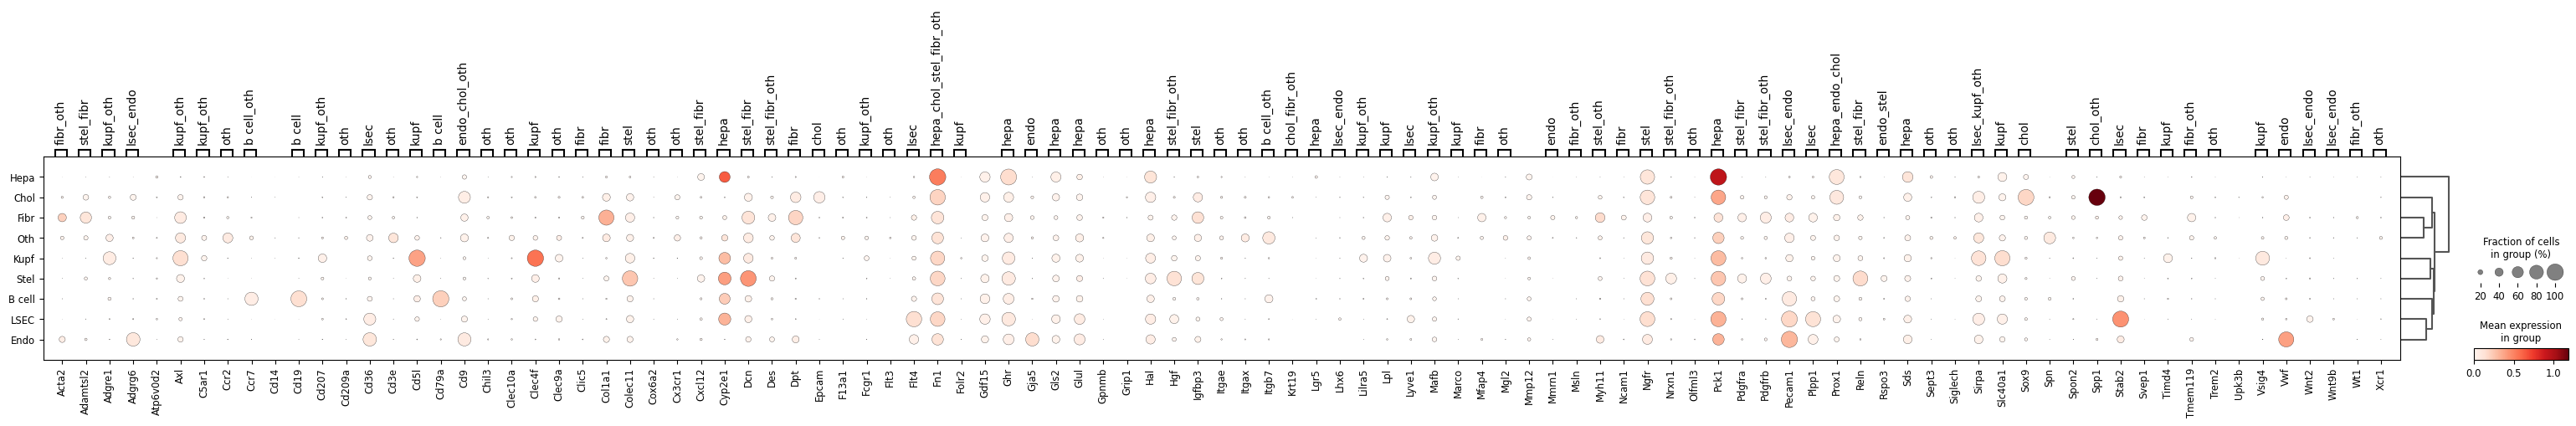

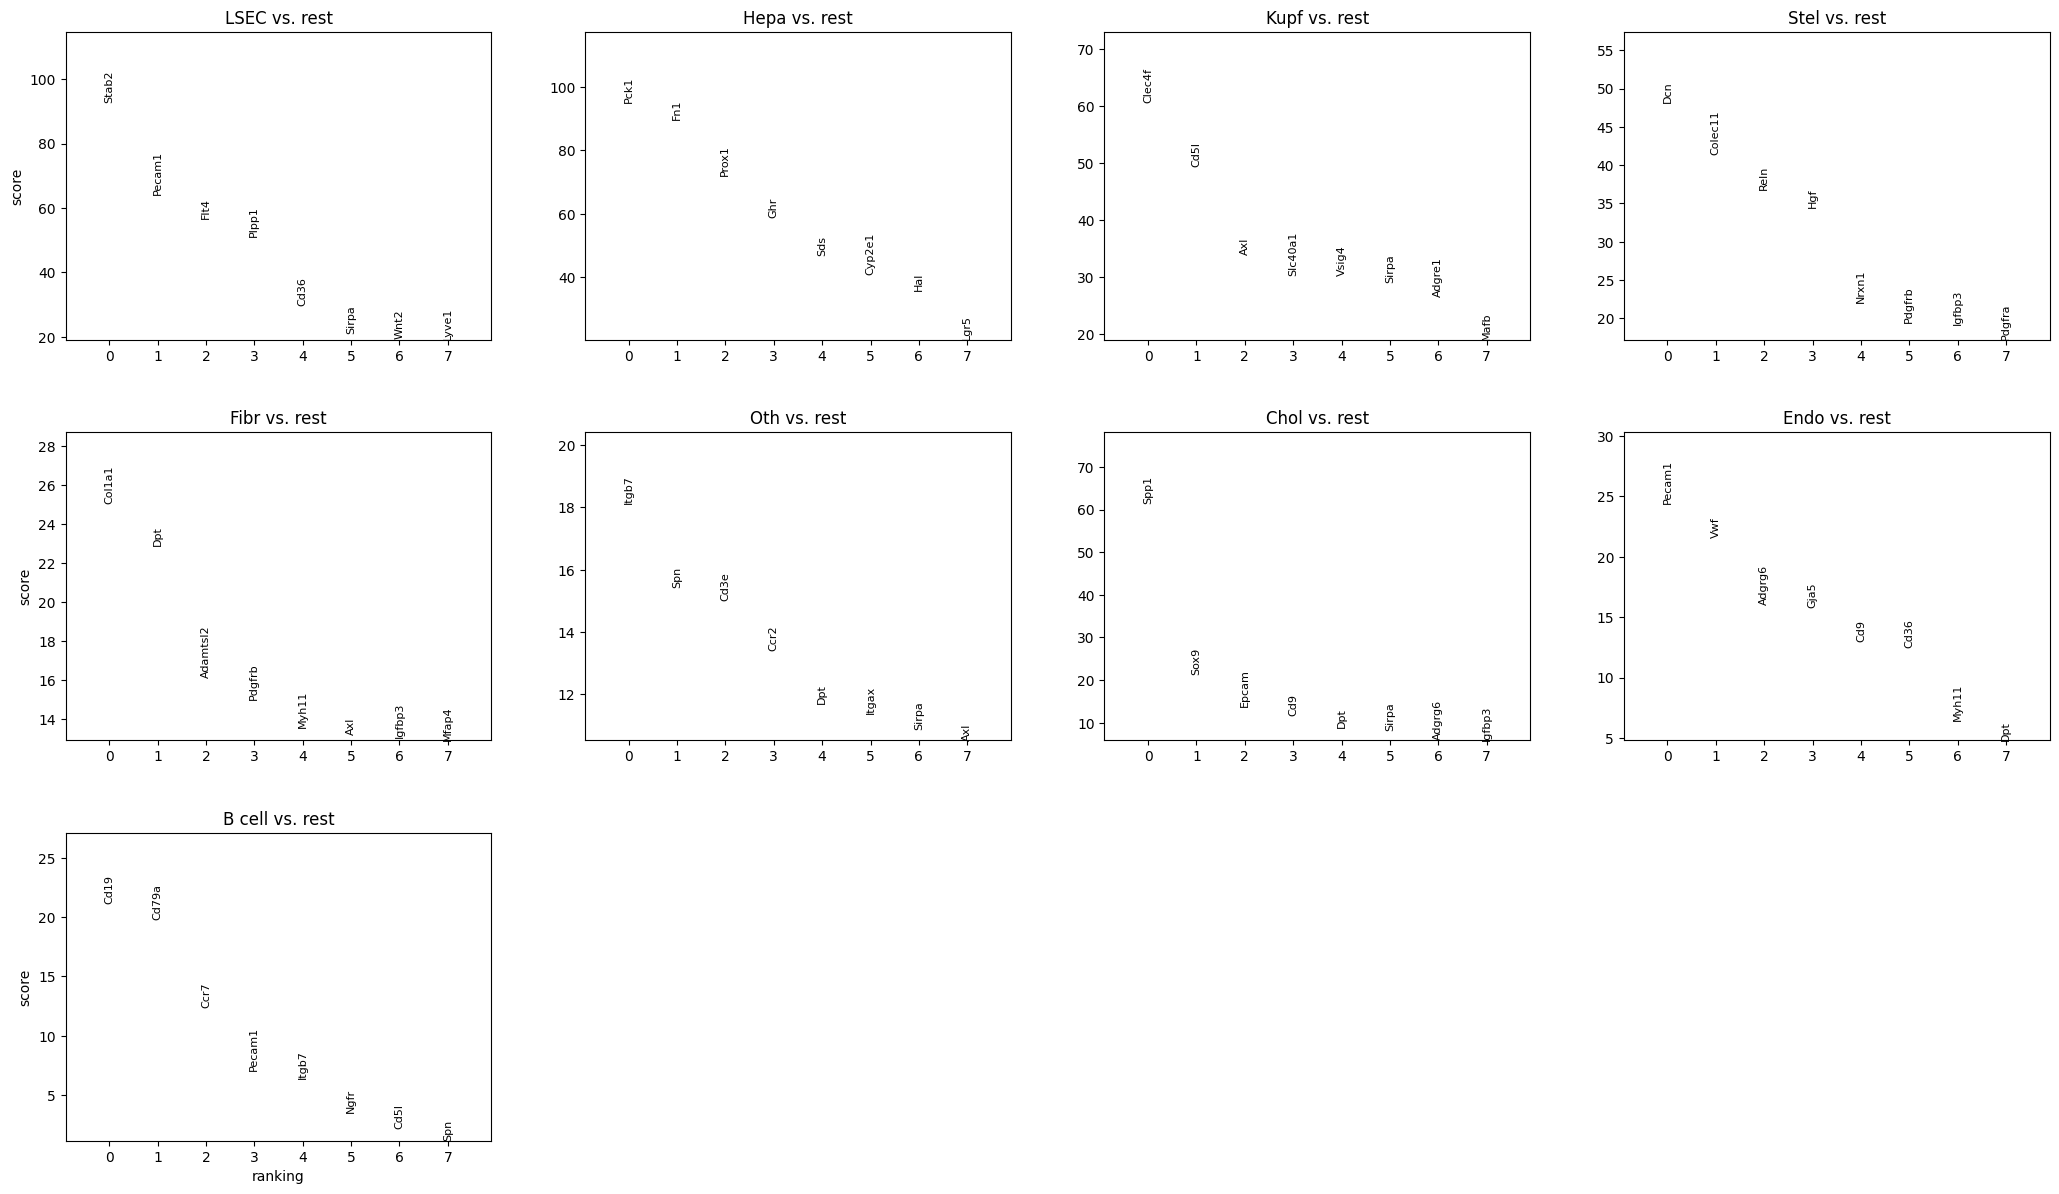

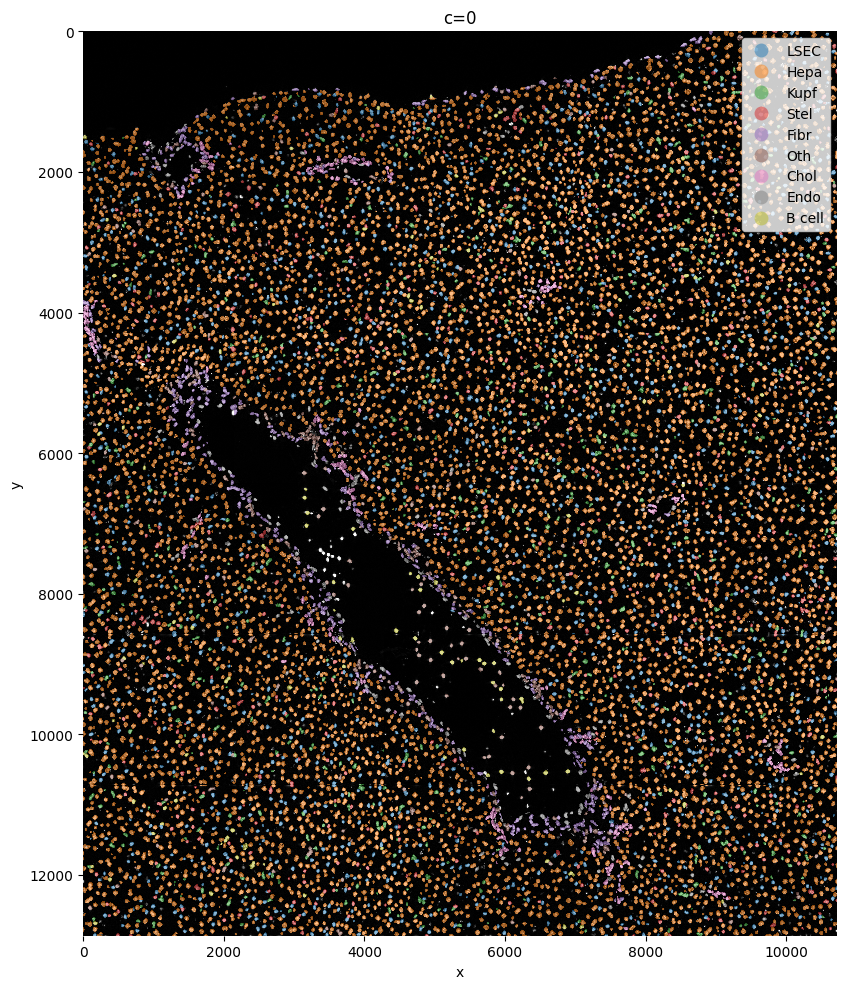

In [4]:
scores_leiden_celltype = make_umap_and_perform_leiden_annotation(sdata,n_PCAs=n_pca,n_neighbors=n_neighb,cluster_resolution=n_clust_res)
suffix = '_' + str(n_pca) + '_' + str(n_neighb) + '_' + str(n_clust_res) 
suffix_short = '_' + str(n_pca) + '_' + str(n_neighb) 
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
visualize_classification(sdata,'leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=False,plot_dot_plot=True,plot_rank_genes_groups=True,plot_image=True)
print(sdata.table.uns['mapping_cell_type_leiden'+suffix])
visualize_classification(sdata,'annotation_leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=True,plot_dot_plot=True,plot_rank_genes_groups=True,plot_image=True)

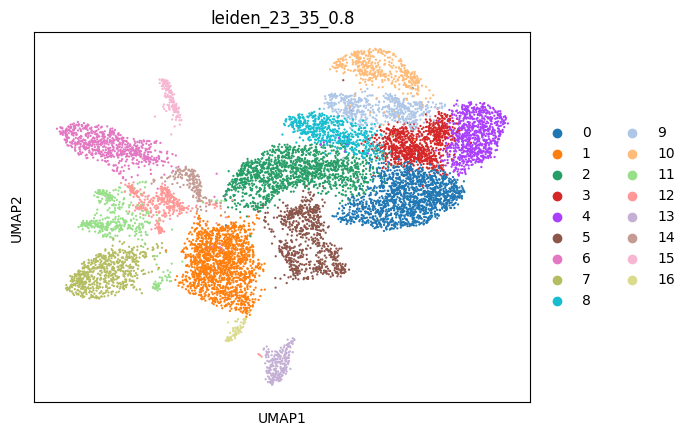

    leiden_23_35_0.8
0           0.135910
1           0.133684
2           0.122105
3           0.082561
4           0.074724
5           0.063858
6           0.060029
7           0.055843
8           0.052636
9           0.050410
10          0.040702
11          0.037317
12          0.035002
13          0.021375
14          0.014784
15          0.013092
16          0.005967
{'B cell': ['15'], 'Chol': ['13'], 'Endo': ['14'], 'Fibr': ['11'], 'Hepa': ['0', '2', '3', '4', '5', '8', '9', '10'], 'Kupf': ['6'], 'LSEC': ['1', '16'], 'Oth': ['12'], 'Stel': ['7']}


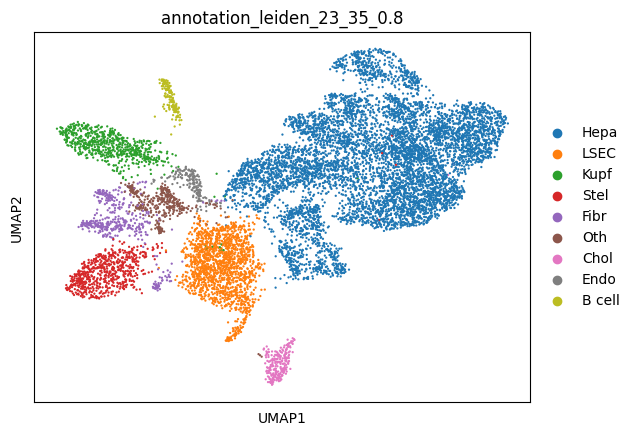

           atlas  annotation_leiden_23_35_0.8
B cell  0.006215                     0.013092
Chol    0.026733                     0.021375
Hepa    0.579985                     0.622907
Oth     0.061609                     0.035002
Kupf    0.032037                     0.060029
Endo    0.032894                     0.014784
LSEC    0.092414                     0.139651
Fibr    0.030430                     0.037317
Stel    0.137683                     0.055843


In [6]:
n_neighb = 35    
n_clust_res = 0.8
make_umap_and_perform_leiden_annotation(sdata,n_PCAs=n_pca,n_neighbors=n_neighb,cluster_resolution=n_clust_res)
suffix = '_' + str(n_pca) + '_' + str(n_neighb) + '_' + str(n_clust_res) 
suffix_short = '_' + str(n_pca) + '_' + str(n_neighb) 
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
visualize_classification(sdata,'leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=False,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
print(sdata.table.uns['mapping_cell_type_leiden'+suffix])
visualize_classification(sdata,'annotation_leiden'+suffix,'umap'+suffix_short,path_mg,cell_type_annotation=True,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

In [8]:
sdata

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tophat_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'expanded_cells20': GeoDataFrame shape: (11228, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_segmentation': GeoDataFrame shape: (50, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_size': GeoDataFrame shape: (280, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_